## Classification 
predict which group a new target object belongs to by comparing it to identified objects. The identified, or labeled objects are called the training set.

## KNN - K-Nearest Neighbors
Find the k nearest objects to the target object using some distance metric. Then these k nearest neighbors get to vote on the identity of the target object.  
For example, if k=5, we find the 5 nearest objects in our training set. If three of them are apples, one is a pear and one is an orange then we predict our target object is an apple.  

In [ ]:
import numpy as np
import pandas as pd

## How to Import IRIS data

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [ ]:
from IPython.display import HTML
url = 'https://en.wikipedia.org/wiki/Iris_flower_data_set'
iframe = '<iframe src=' + url + ' width="100%" height=400></iframe>'
HTML(iframe)

# IMPORT IRIS DATA

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df['class']=iris.target
iris_df.head()

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.columns=[0, 1, 2, 3, 'species']
iris_df['distance'] = 9999
iris_df.head()

,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,0,9999
1,4.9,3.0,1.4,0.2,0,9999
2,4.7,3.2,1.3,0.2,0,9999
3,4.6,3.1,1.5,0.2,0,9999
4,5.0,3.6,1.4,0.2,0,9999


Create an unidentified Target instance, then we will try to predict its species using knn.

In [ ]:
target = pd.Series([7.0, 3.1, 5.6, 1.9])
target

0    7.0
1    3.1
2    5.6
3    1.9
dtype: float64

NameError: ignored

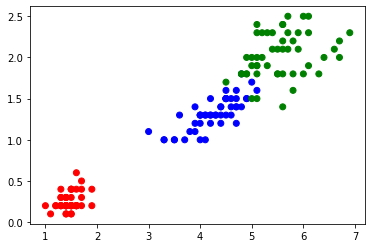

In [ ]:
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(
    iris_df[2], 
    iris_df[3], 
    c=iris_df['species'].map(colors))
plt.xlabel(cols[2])
plt.ylabel(cols[3])

### Distance
There are a variety of ways to measure [distance](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa).  If there are many attributes, we may use a subset of the attributes to compare objects.  
We'll use Euclidean distance, similar to Pythagorean Theorem but scaled to more attributes.  
We compute the distance of every training instance from the target.

In [ ]:
iris_df['distance'] = ((iris_df.loc[:,0]-target[0])**2 + (iris_df.loc[:,1]-target[1])**2 + (iris_df.loc[:,2]-target[2])**2 + (iris_df.loc[:,3]-target[3])**2) ** 0.5
iris_df.loc[::10]

,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,0,4.929503
10,5.4,3.7,1.5,0.2,0,4.756049
20,5.4,3.4,1.7,0.2,0,4.555217
30,4.8,3.1,1.6,0.2,0,4.871345
40,5.0,3.5,1.3,0.3,0,5.020956
50,7.0,3.2,4.7,1.4,1,1.034408
60,5.0,2.0,3.5,1.0,1,3.229551
70,5.9,3.2,4.8,1.8,1,1.367479
80,5.5,2.4,3.8,1.1,1,2.572936
90,5.5,2.6,4.4,1.2,1,2.104757


We sort the training records by distance, and add the species of the (k=7) items nearest to the target to a list.

In [ ]:
k = 7
train = iris_df.sort_values('distance', ascending=True)
train

,0,1,2,3,species,distance
139,6.9,3.1,5.4,2.1,2,0.300000
112,6.8,3.0,5.5,2.1,2,0.316228
102,7.1,3.0,5.9,2.1,2,0.387298
124,6.7,3.3,5.7,2.1,2,0.424264
129,7.2,3.0,5.8,1.6,2,0.424264
...,...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,0,5.285830
42,4.4,3.2,1.3,0.2,0,5.305657
38,4.4,3.0,1.3,0.2,0,5.305657
22,4.6,3.6,1.0,0.2,0,5.482700


In [ ]:
knn = list(train.head(k).species)
knn

[2, 2, 2, 2, 2, 2, 2]

We use mode to get the most popular of the knn list. In this example the whole knn list is Iris-virginica, so our prediction is obvious. But sometimes the list of nearest neighbors will be a variety, and the mode tells us our prediction.

In [ ]:
from statistics import mode
print(mode(knn))

2


To check our prediction, we plot the training set on a scatter plot, then plot our target. Here we can see our target is surrounded by Iris-virginica instances, so our prediction is probably correct.

NameError: ignored

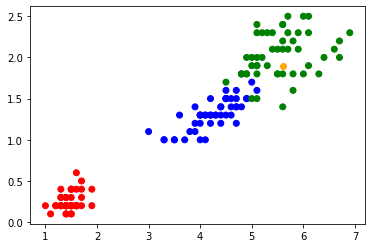

In [ ]:
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(
    iris_df[2], 
    iris_df[3], 
    c=iris_df['species'].map(colors))
plt.scatter(target[2], target[3], c='orange')
plt.xlabel(cols[2])
plt.ylabel(cols[3])
plt.title('Iris Data Scatter Plot')

##How to implement using SKLEARN

In [ ]:
## load the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' 
## Specifying column names.
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
## map each iris species to a number with a dictionary and list comprehension.
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species_num'] = [iris_class[i] for i in iris.species]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
## Create an 'X' matrix by dropping the irrelevant columns.
X = iris.drop(['species', 'species_num'], axis=1)
y = iris.species_num

In [ ]:
from sklearn.model_selection import train_test_split
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

In [ ]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 7 neighbors. 
knn = KNeighborsClassifier(n_neighbors=7)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
knn.score(X_test, y_test)

0.9833333333333333

Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

1. Sepal length
2. Sepal width


This example shows how to plot the decision surface for four SVM classifiers with different kernels.


The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:


1. LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
2. LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.


Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.


Note while plotting the decision function of classifiers for toy 2D datasets can help get an intuitive understanding of their respective expressive power, be aware that those intuitions don’t always generalize to more realistic high-dimensional problems.


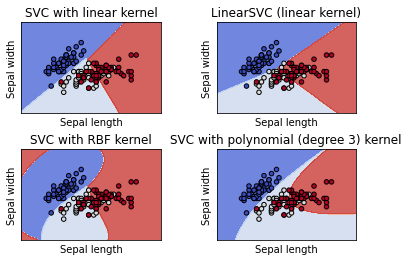

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()